# Curso de Machine Learning Aplicado con Python

![Machine-Learning](assets/Machine-Learning.jpg)

## Feedback de tus modelos

<div style="color:#032402;background-color:#9fe19d">
Ciertos modelos como la regresión o los arboles se dicen <b>"Interpretables".</b> Esto quiere decir que de los resultados de los modelos podemos sacar conclusiones o <b>"insights"</b>.
</div>

En particular la regresión Lasso es interpretable:
* Mientras mas grande el coeficiente para una feature, más relevante es esta para la regresión.
* La regresón Lasso trata de seleccionar un pequeño número de features relevantes.

In [51]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
print("""Librerias importadas:\t
Version Numpy:     \t{} 
Version Pandas:    \t{}"""
.format(np.__version__,pd.__version__))

Librerias importadas:	
Version Numpy:     	1.18.1 
Version Pandas:    	0.24.2


In [53]:
#X = pd.read_csv('X.csv')
X = pd.read_csv('https://raw.githubusercontent.com/renemorenow/MachineLearning-Python/master/X.csv',encoding='utf-8',sep=',')

y = X['Worldwide Gross']
X = X.drop(['Worldwide Gross', 'gross'],axis=1)

Muchos de los modelos pueden dar feedback de que tan bien estan diseñadas las features, estos modelos al final se llaman interpretables, por que de ellos podemos obtener insights

In [54]:
#Volveremos a entrenar el modelo
from sklearn.linear_model import Lasso
model = Lasso()

In [55]:
#Separamos los datos de entrenamiento y de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [56]:
print("X_train divido por default, coge el",(len(X_train)/len(X))*100,"% de los datos y el otro",100-((len(X_train)/len(X))*100),"% se asigno a X_test")


X_train divido por default, coge el 74.99501097585312 % de los datos y el otro 25.00498902414688 % se asigno a X_test


In [57]:
#Entrenamos nuestro modelo
model.fit(X_train,y_train)

C:\Users\wmoreno\AppData\Local\ESRI\conda\envs\my_arcgispro-py3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1506546466543624e+19, tolerance: 1.1095042071273348e+16
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
#Evaluamos el puntaje de nuestro modelo
model.score(X_test,y_test)

0.5518152414652032

In [59]:
#El coeficiente, 
#En sklearn hay una convencion de que los atributos de los estimadores siempre van al final con underscore '_'
model.coef_
#Esto lo que nos da es los parametros de la regresion lineal

array([ 2.66836165,  0.42927668,  4.52432656, -4.49762354, -0.03514888,
        0.04884007,  1.92027011, -1.88398994,  1.66220914, -1.72059163,
        0.1450648 , -0.1222211 ,  0.0134981 , -0.01665126,  3.73295908,
       -3.55316518])

In [60]:
#Vamos a hacer un truco: vamos a mirar solo los valores absolutos en base 10
#Con floor dejamos solo el entero
var = np.floor(np.log10(np.abs(model.coef_)))

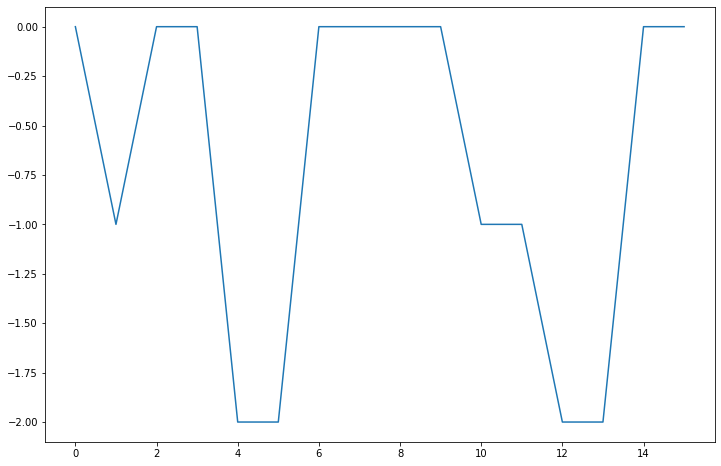

In [61]:
#Graficamos esto
plt.rcParams["figure.figsize"] = [12, 8]
plt.plot(var)

Con esto podemos saber en que orden de magnitud se encuentran nuestros features

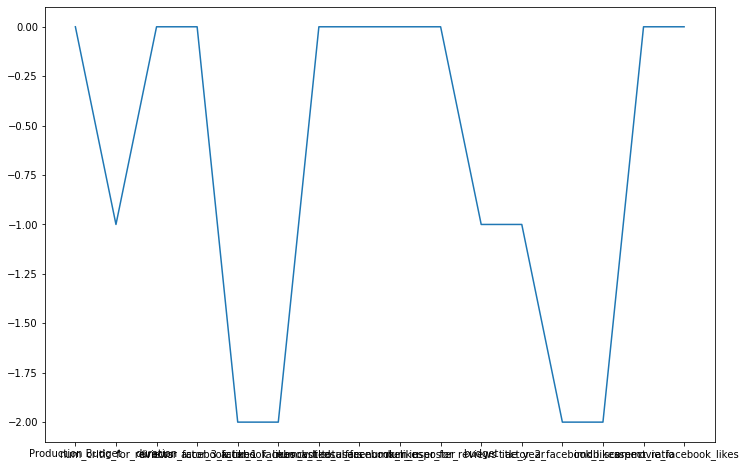

In [62]:
#Graficamos esto y veremos de que features se trata
plt.rcParams["figure.figsize"] = [12, 8]
plt.plot(var)
plt.xticks(np.arange(16),list(X.columns));

In [63]:
X.columns

Index(['Production Budget', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

Esto nos guia que segun este modelo y por lo tanto las unicas features
que deberia guardar únicamente son(las mas altas):
* Production Budget
* num_voted_users
* cast_total_facebook_likes
* facenumber_in_poster
* num_user_for_reviews
* budget
* title_year
* movie_facebook_likes

## Correlación entre variables

In [ ]:
import seaborn as sns

#concanteno nuevamente la target para ver la correlacion
z = pd.concat((X,y),axis=1)
sns.pairplot(z)
print('Librerias importadas: {}'.format(sns.__version__))

Lo que buscamos es que la correlacion entre nuestro variable target(Worldwide Gross que se encuentra en la ultima fila) ylas demas features sean la mas grande(que se dibuje una diagonal)


In [74]:
#pd.cut nos permite organizar todo en contenedores distintos
# con cat no referimos a categorias
# por ultimo le damos un nombre
# lo que es una serie(un dataframe de una sola dimension)
clase = pd.cut(X['Production Budget'],17).cat.codes.rename('class')
#Luego lo concatenamos
z2 = pd.concat([X, clase],axis=1)

Lo que quiere decir esta nueva columna ('class') es que entre mas grande sea el valor mas se invirtio en el presupuesto de esa pelicula,
por ejemplo si estuviesemos hablando de titanic estaria en la clase mas alta en este caso la 16

In [75]:
#Esto lo volvemos a graficar
#hue="class" hace que pinte segun los valores de class
sns.pairplot(z2,hue='class')

C:\Users\wmoreno\AppData\Local\ESRI\conda\envs\my_arcgispro-py3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000022548B63598> (for post_execute):


KeyboardInterrupt: 

Con esto es mas facil ver que peliculas tiene mayor presupuesto

## 22 - Continuando con el análisis exploratorio

Volvemos a hacer el heatmap pero esta vez con la columna target

In [ ]:
Z3 = pd.concat([X,y],axis=1)
sns.heatmap(Z3.corr())

Podemos ver que la existe mas correlacion entre la variable target y production budget que con budget

**Sklearn posee una serie de métodos para seleccionar las mejores features. Estos metodos los pueden encontrar en SKLEARN.feature_selection**

In [76]:
# importamos la libreria para seleccionar los features
# Lo que hace es hacer un analisis univariado en terminos estadisticos
# Lo cual quiere decir que cada feature va a ser analizada y se va a 
# tratar de ver que tanta informacion aporta y luego se van a elejir la k-mejores
from sklearn.feature_selection import SelectKBest
# importamos otra utilidad de feature_selection que nos dira
# la forma de calcular que tanta infrmacion aporta la feature

from sklearn.feature_selection import mutual_info_regression
# SelectKBest Lo que hace es elegir, pero necesito una metrica y esa metrica 
# se la aporta mutual_info_regression
# Es la k es la cantidad de features queremos seleccionar
selector = SelectKBest(mutual_info_regression, k=4)
# luego llenamos nuestro seleccionador 
selector.fit(X,y)

SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x000002257D5896A8>)

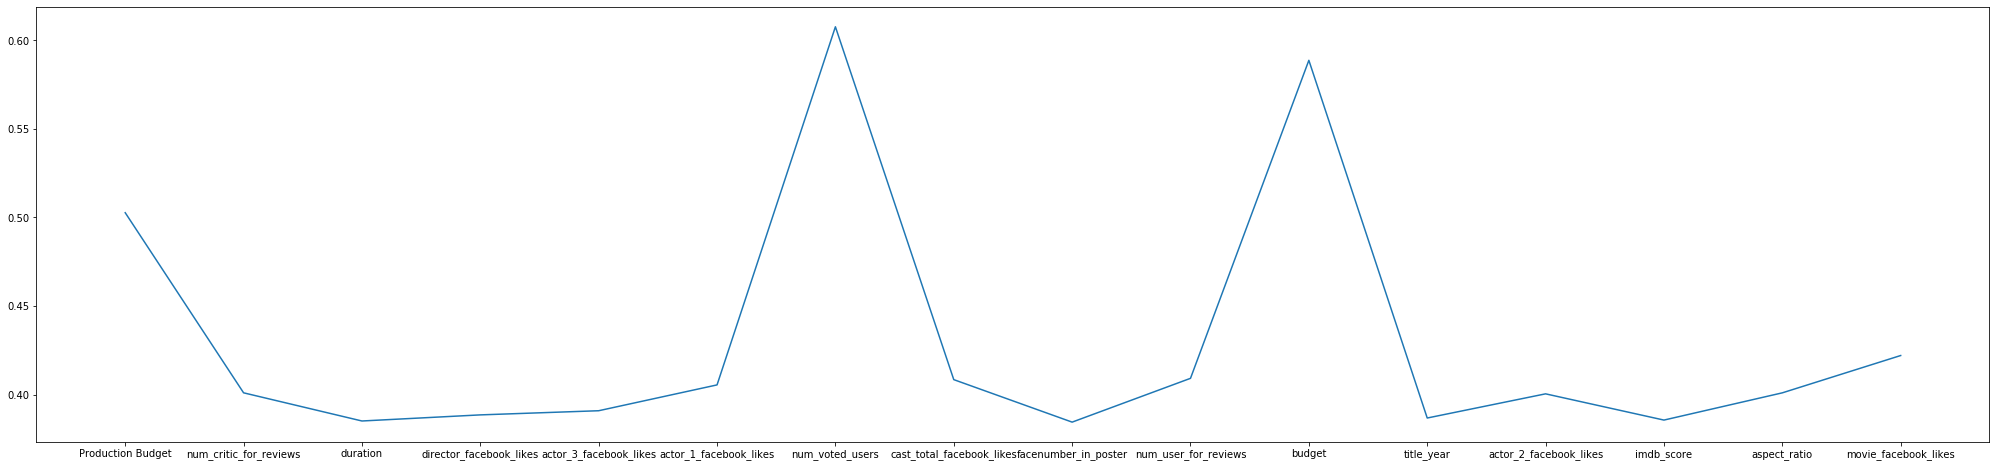

In [77]:
# Ahora nos interes saber que fue escojido
scores = selector.scores_

# y ploteamos esta informacion
#configuramos el grafico para que sea vea mas grande
plt.rcParams["figure.figsize"] = [35,8]
plt.plot(scores)
plt.xticks(np.arange(16),list(X.columns));


In [29]:
X.columns

Index(['Production Budget', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

In [78]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


Por lo que podemos ver las features que mas nos sirven es:

* Production Budget
* num_voted_users
* movie_facebook_likes

##### Guardaremos las 5 features entregadas por la interpretación de nuestra regresión Lasso

In [30]:
X2 = X[['Production Budget', 'title_year', 'num_voted_users', 'movie_facebook_likes', 'budget']]
#Guardar los datos de menor dimensión:
X3 = X[['Production Budget', 'num_voted_users', 'movie_facebook_likes']]

### Veamos los resultados del modelo con estas features

In [31]:
#Lo que hacemos es que hacemos solo un slit ya que este metodo bota datos random
# y luego despues de el split asignamos solo las columnas que nos convienen a cada modelo
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [34]:
cols2 = ['Production Budget', 'title_year', 'num_voted_users', 'movie_facebook_likes', 'budget']
X2_train, X2_test, y2_train, y2_test = X_train[cols2], X_test[cols2], y_train, y_test

cols3 = ['Production Budget', 'num_voted_users', 'movie_facebook_likes']
X3_train, X3_test, y3_train, y3_test = X_train[cols3], X_test[cols3], y_train, y_test

In [35]:
#Vamos a la regresión instanciando 3 modelos lasso:
from sklearn.linear_model import Lasso

model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(X_train,y_train)
model2.fit(X2_train,y2_train)
model3.fit(X3_train,y3_train)

C:\Users\wmoreno\AppData\Local\ESRI\conda\envs\my_arcgispro-py3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2390468212761068e+19, tolerance: 1.100551844211402e+16
  positive)
C:\Users\wmoreno\AppData\Local\ESRI\conda\envs\my_arcgispro-py3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3083636317028676e+19, tolerance: 1.100551844211402e+16
  positive)
C:\Users\wmoreno\AppData\Local\ESRI\conda\envs\my_arcgispro-py3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3172509822752317e+19, tolerance: 1.100551844211402e+16
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
print(model1.score(X_test,y_test))
print(model2.score(X2_test,y2_test))
print(model3.score(X3_test,y3_test))

0.6051191065021486
0.6059533495022504
0.6034589923215752


## Hemos iterado y nos hemos fijado que con las features que hemos puesto en el segundo modelo tenemos un resultado apenas mas acertado que con los otros modelos